## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
data = pd.read_csv('german.csv', sep=';')

scaler = MinMaxScaler()

X = data[
    ['Account_Balance', 
    'Duration_of_Credit_monthly', 
    'Payment_Status_of_Previous_Credit', 
    'Purpose',
    'Credit_Amount',
    'Value_Savings_Stocks',
    'Length_of_current_employment', 
    'Instalment_per_cent',
    'Sex_Marital_Status', 
    'Guarantors', 
    'Duration_in_Current_address',
    'Most_valuable_available_asset', 
    'Age_years',
    'Concurrent_Credits',
    'Type_of_apartment',
    'No_of_Credits_at_this_Bank', 
    'Occupation',
    'No_of_dependents',
    'Telephone',
    'Foreign_Worker'
    ]
].to_numpy()
y = data.iloc[:, 0].to_numpy()

X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

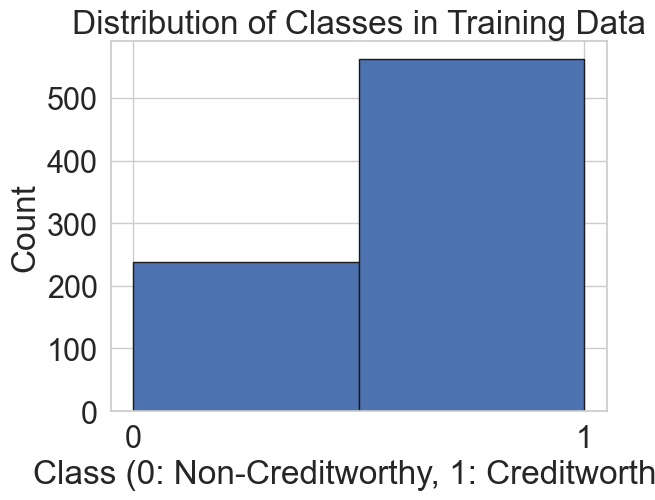

In [53]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [54]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)


# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)



Random Forest метрики:
ROC AUC: 0.66
Accuracy: 0.73
Precision: 0.78
Recall: 0.86

Gradient Boosting метрики:
ROC AUC: 0.66
Accuracy: 0.73
Precision: 0.78
Recall: 0.86

Интерсно посмотреть, какие признаки самые значащие для модели rf?

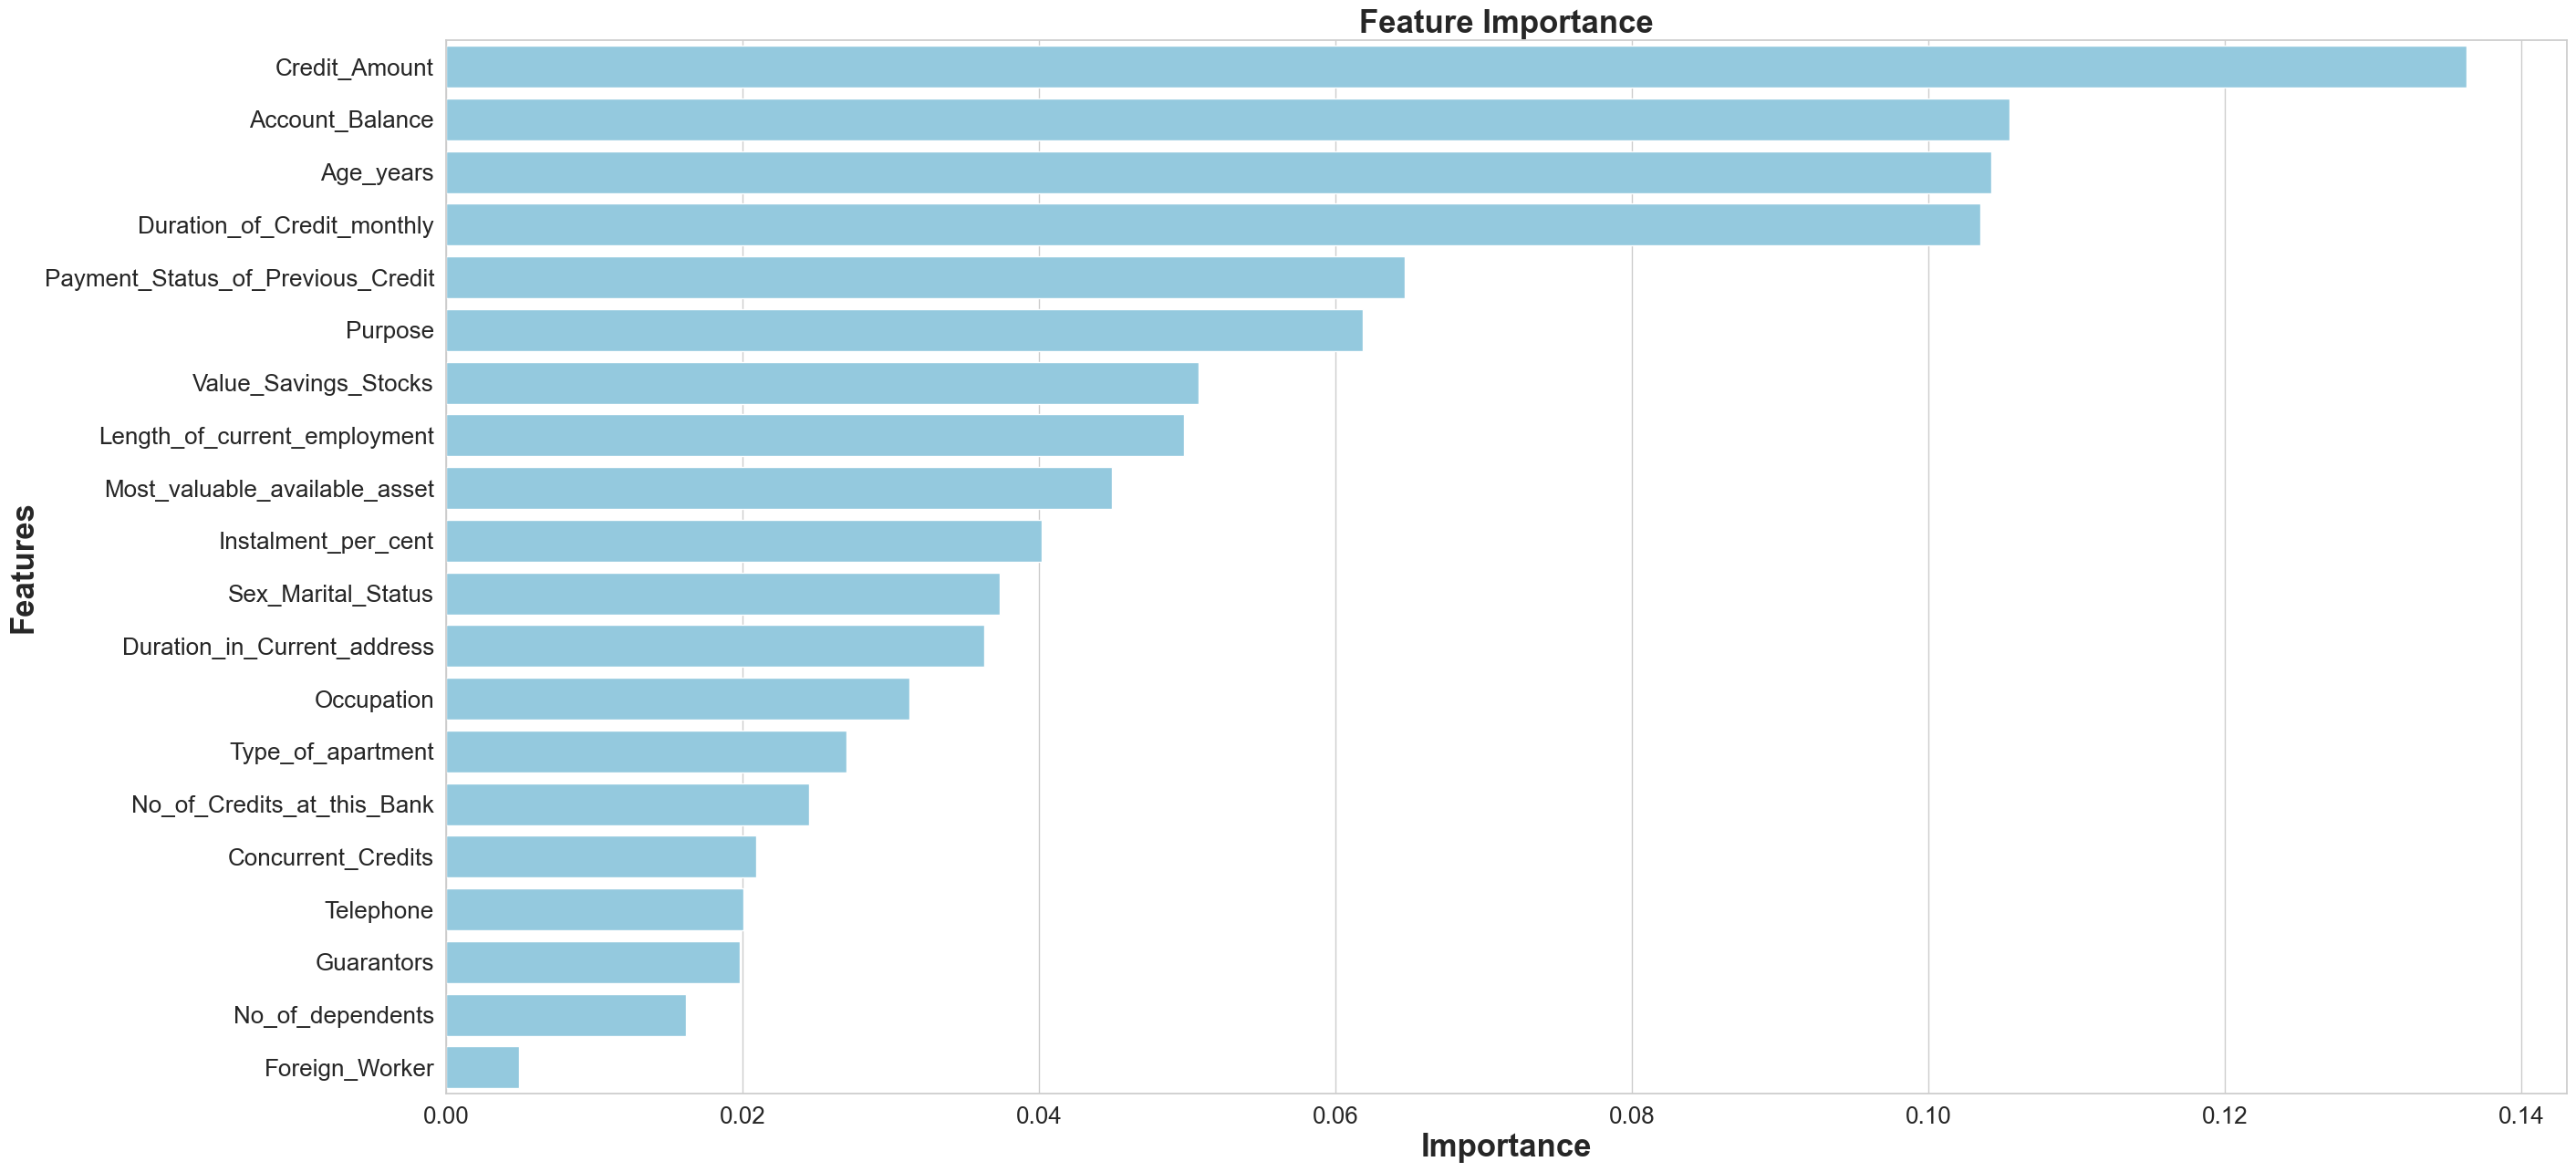

None

,Features,Gini-Importance
0,Credit_Amount,0.136288
1,Account_Balance,0.105509
2,Age_years,0.104264
3,Duration_of_Credit_monthly,0.103537
4,Payment_Status_of_Previous_Credit,0.064698
5,Purpose,0.061853
6,Value_Savings_Stocks,0.050754
7,Length_of_current_employment,0.049798
8,Most_valuable_available_asset,0.044903
9,Instalment_per_cent,0.040173


In [55]:
feats = {}
for feature, importance in zip(data.drop(columns=['Creditability']).columns, rf_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set_theme(font_scale = 5)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

для gradient boosting:

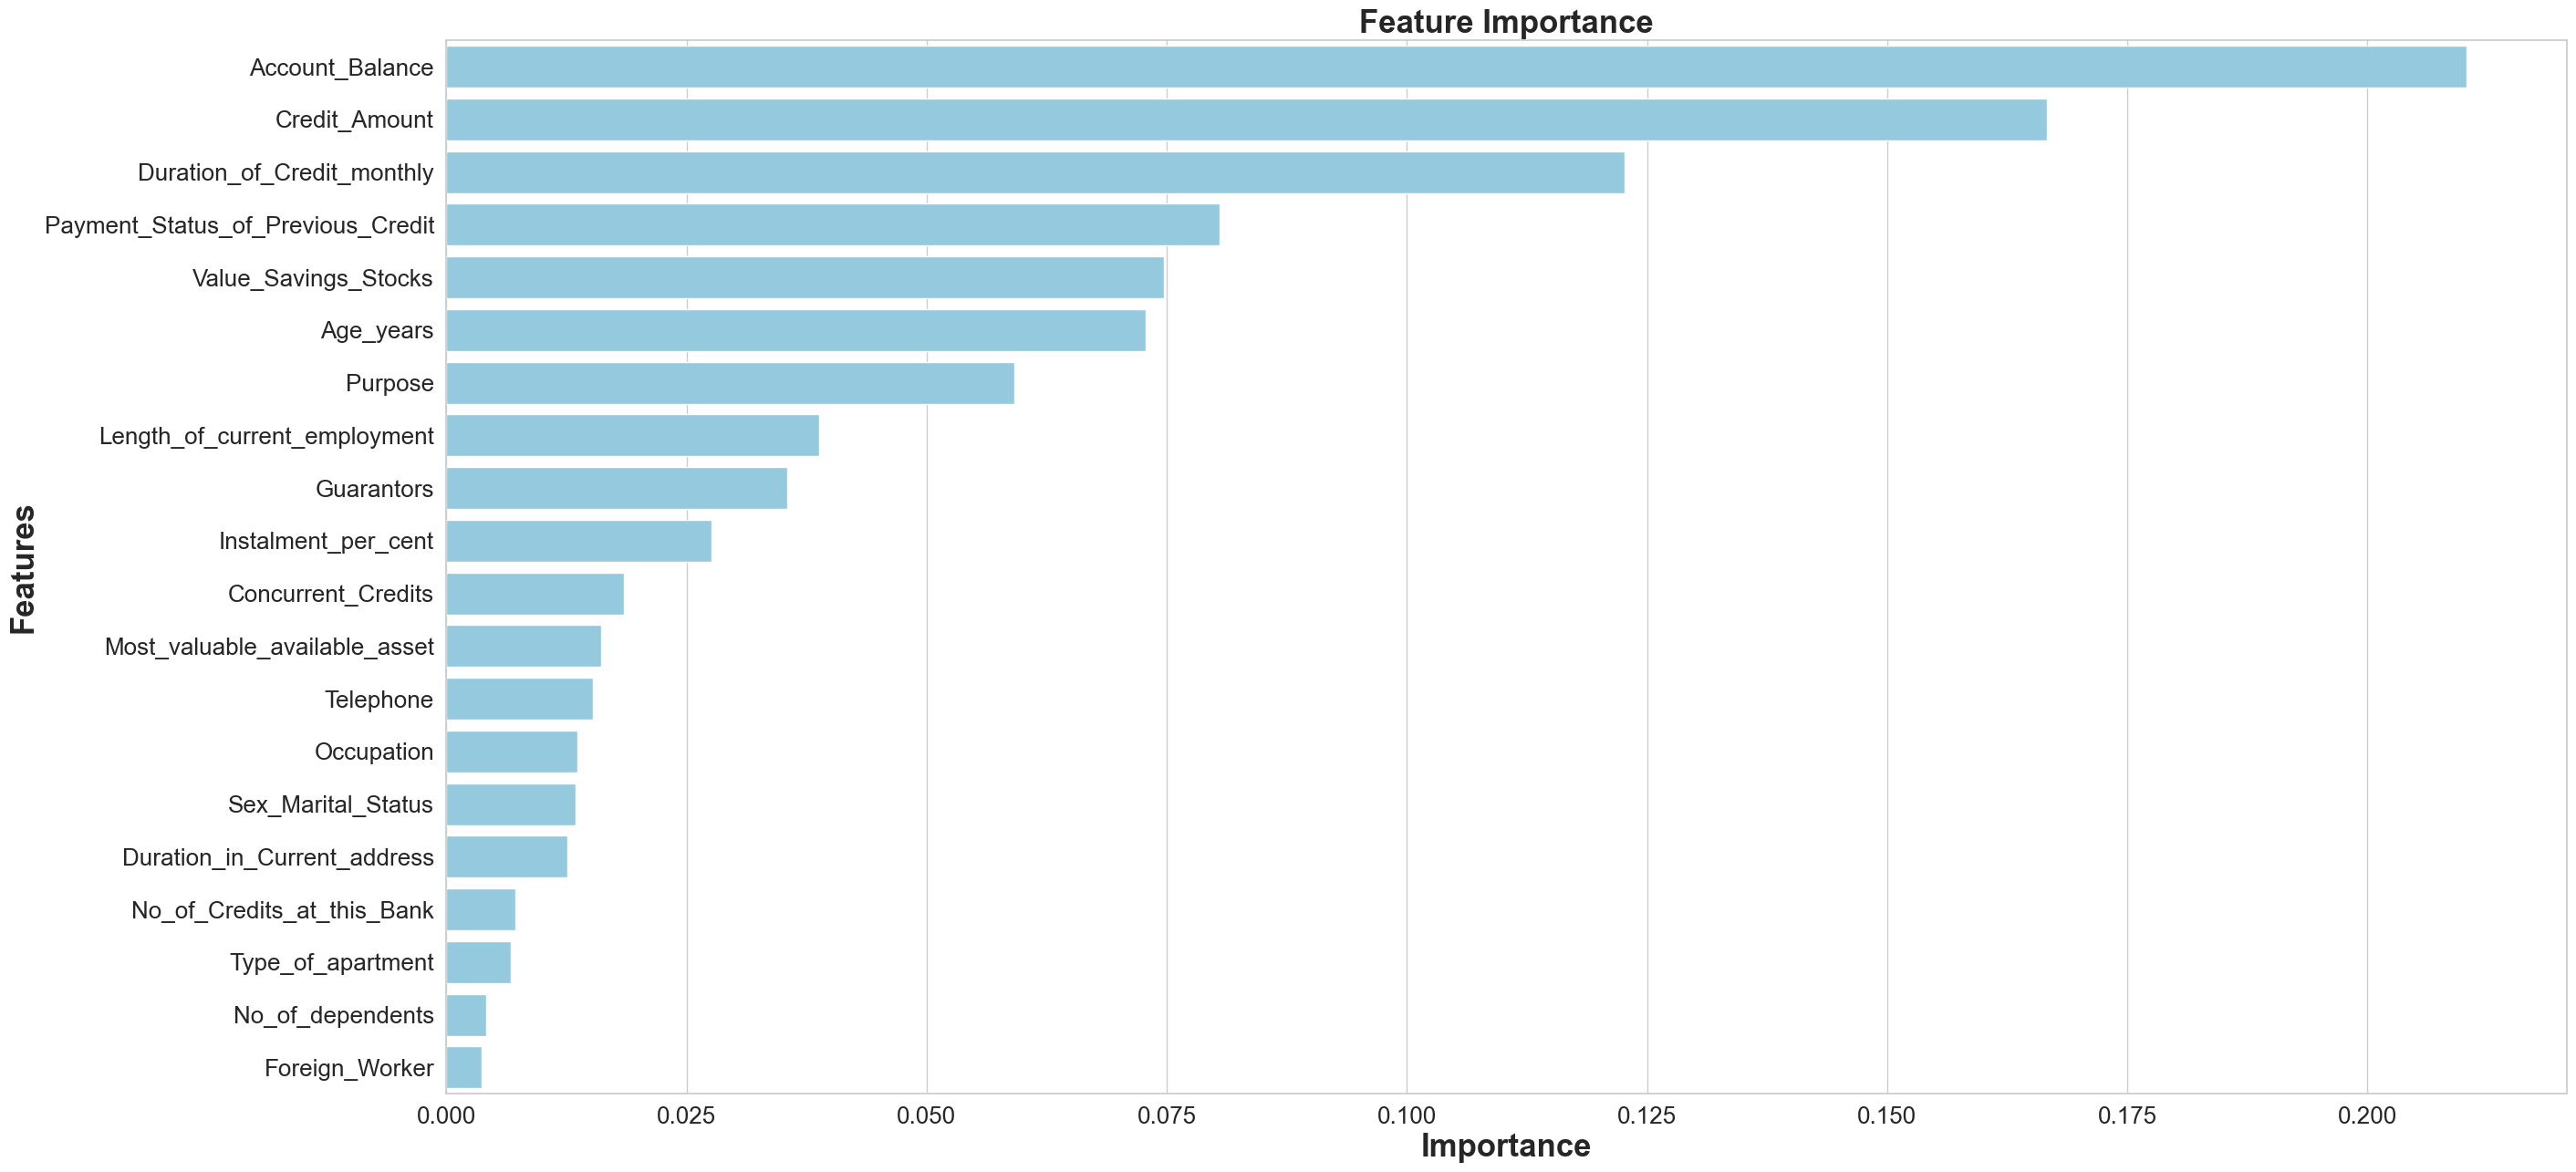

None

,Features,Gini-Importance
0,Account_Balance,0.210272
1,Credit_Amount,0.166668
2,Duration_of_Credit_monthly,0.122661
3,Payment_Status_of_Previous_Credit,0.080512
4,Value_Savings_Stocks,0.074707
5,Age_years,0.072840
6,Purpose,0.059117
7,Length_of_current_employment,0.038776
8,Guarantors,0.035493
9,Instalment_per_cent,0.027567


In [56]:
feats = {}
for feature, importance in zip(data.drop(columns=['Creditability']).columns, gb_model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set_theme(font_scale = 5)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

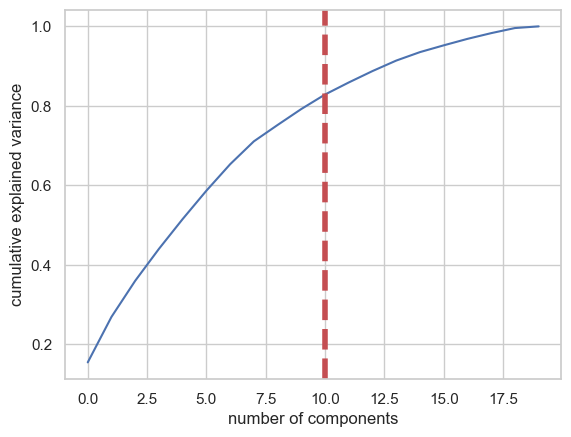

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.154687,0.154687
1,0.269159,0.114472
2,0.359988,0.090828
3,0.440297,0.080309
4,0.515345,0.075048
5,0.586648,0.071303
6,0.653162,0.066514
7,0.710778,0.057616
8,0.751956,0.041178
9,0.792140,0.040184


In [57]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=20)
pca_test.fit(X_train)
sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

согласно графику, при переходе от к 15 компонентам можно объяснить 95% дисперсии данных. Больше брать смысла нет.

In [58]:
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

param_dist = {'n_estimators': [int(x) for x in np.linspace(100, 300, 10)],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(1, 25, 10)],
               'min_samples_split': [int(x) for x in np.linspace(2, 25, 10)],
               'min_samples_leaf': [int(x) for x in np.linspace(1, 25, 10)],
               'criterion':  ['gini', 'entropy', 'log_loss']}

rf_test = RandomForestClassifier()

rs1 = RandomizedSearchCV(rf_test, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        n_jobs=-1)

rs1.fit(X_train_pca, y_train)
rs1.best_params_


{'n_estimators': 211,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'log_loss'}

In [10]:
rs1_df = pd.DataFrame(rs1.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs1_df = rs1_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs1_df

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,211,14,9,log2,25,log_loss,0.78125,0.74375,0.75250,1
1,122,19,11,sqrt,17,log_loss,0.79375,0.73750,0.74750,2
2,211,4,9,sqrt,6,gini,0.77500,0.72500,0.74625,3
3,166,25,11,log2,22,log_loss,0.80000,0.71875,0.74625,3
4,211,19,11,sqrt,14,entropy,0.78125,0.71250,0.74625,5
...,...,...,...,...,...,...,...,...,...,...
95,255,22,11,sqrt,1,entropy,0.70000,0.70000,0.70250,96
96,211,9,17,sqrt,1,gini,0.70000,0.70000,0.70250,96
97,255,25,3,log2,1,entropy,0.70000,0.70000,0.70250,96
98,166,4,22,sqrt,1,gini,0.70000,0.70000,0.70250,96


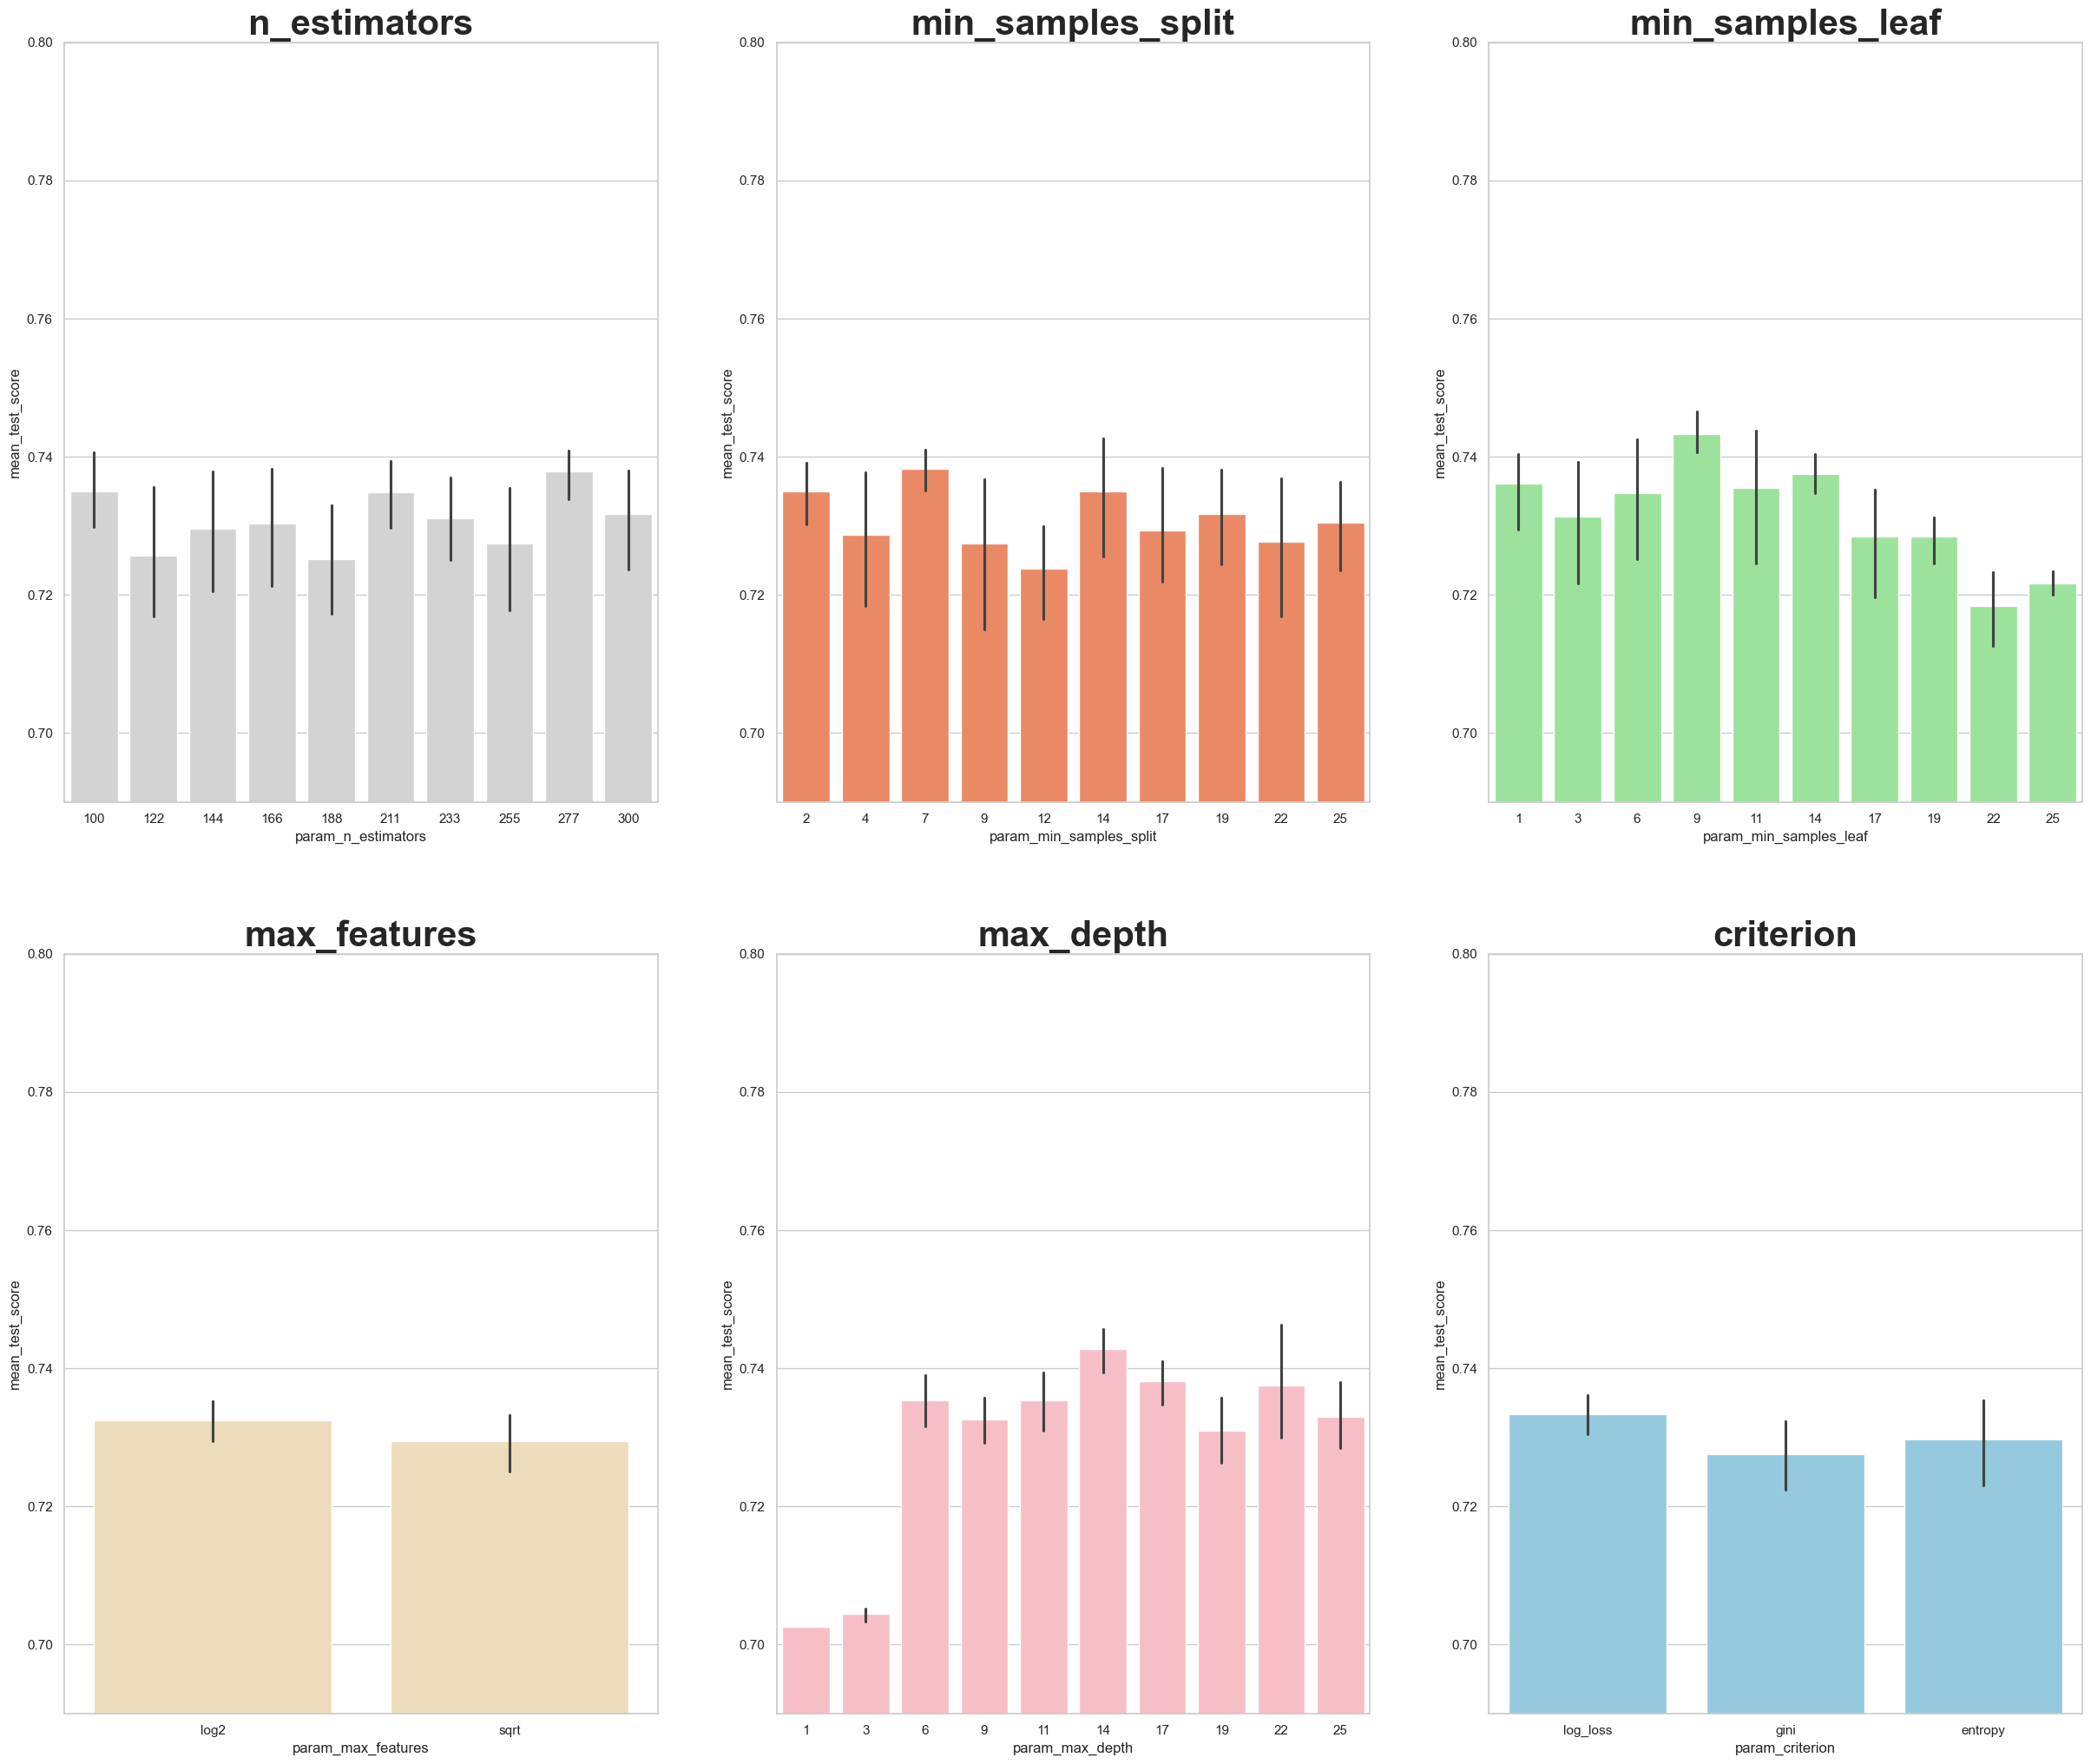

In [11]:


fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs1_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.69,.80])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs1_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.69,.80])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs1_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.69,.80])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs1_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.69,.80])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs1_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.69,.80])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs1_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.69,.80])
axs[1,2].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

In [12]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

param_dist = {'n_estimators': [int(x) for x in np.linspace(100, 300, 10)],
              'learning_rate': [0.01, 0.05, 0.1, 0.15],
               'criterion':  ['friedman_mse', 'squared_error']}

gb_test = GradientBoostingClassifier()

rs2 = RandomizedSearchCV(gb_test, 
                        param_dist, 
                        n_iter = 50, 
                        cv = 5, 
                        n_jobs= -1)

rs2.fit(X_train_pca, y_train)
rs2.best_params_

c:\Users\Stepan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


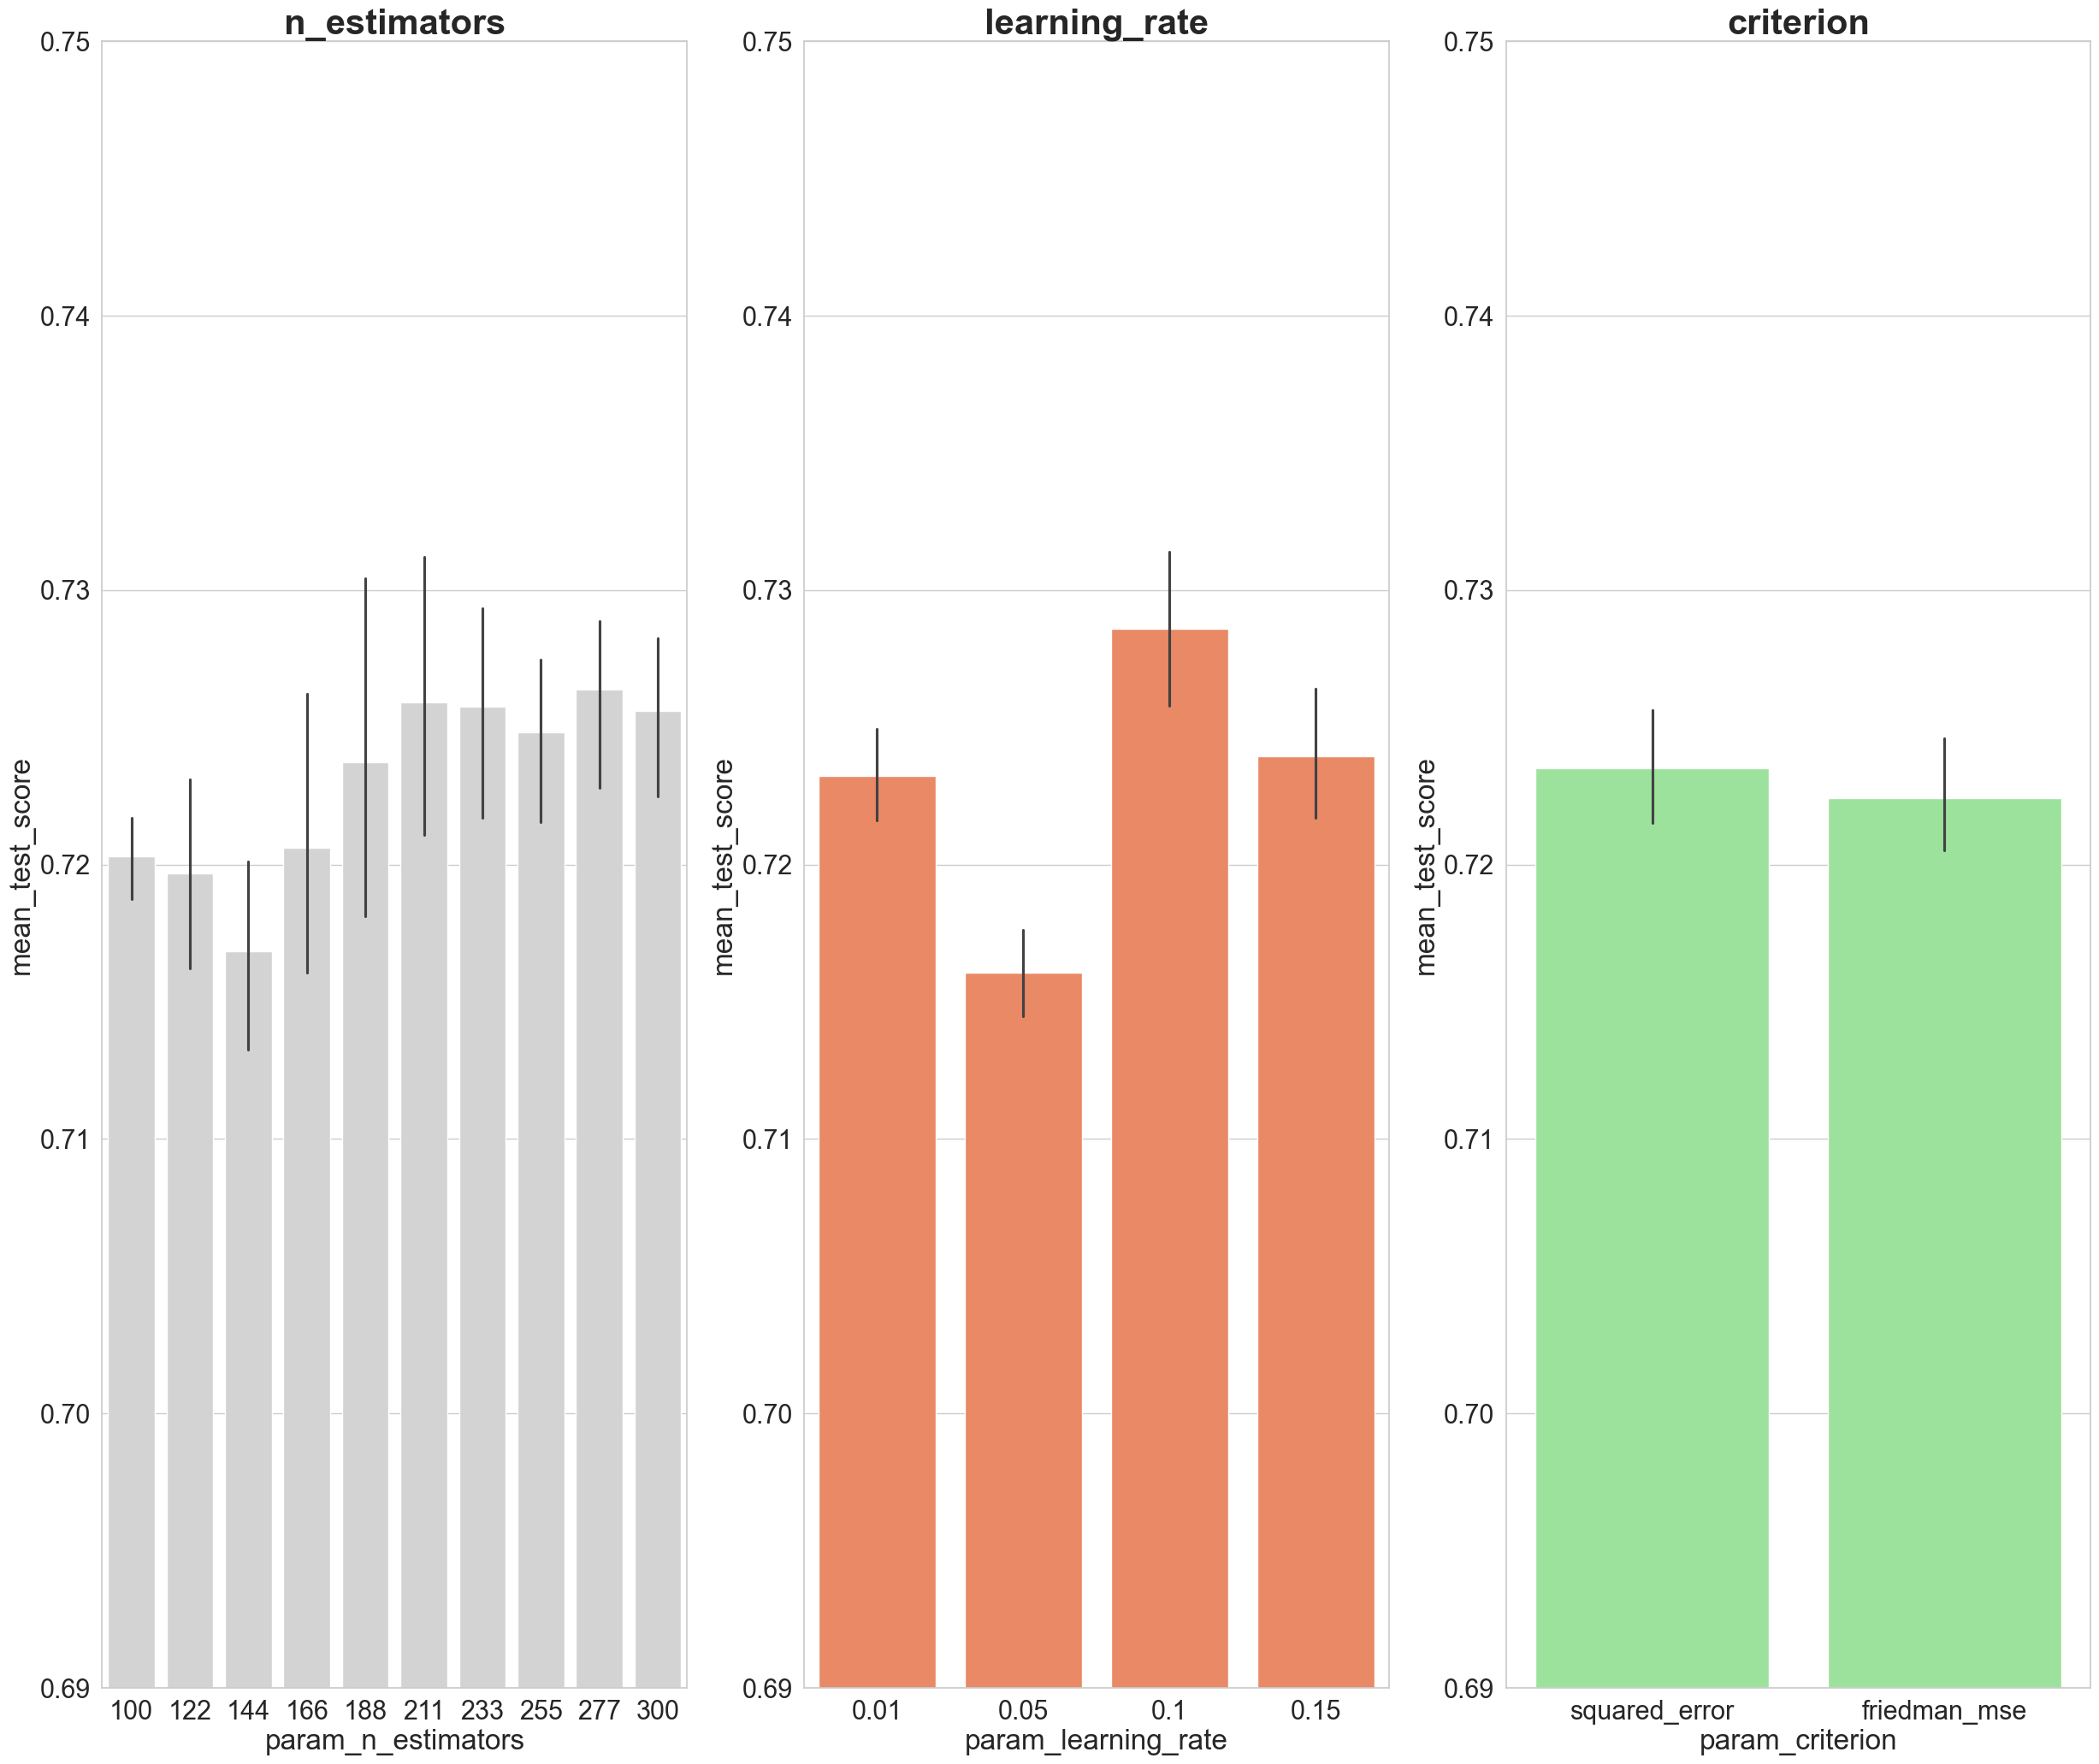

In [63]:
rs2_df = pd.DataFrame(rs2.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs2_df = rs2_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs2_df, ax=axs[0], color='lightgrey')
axs[0].set_ylim([.69,.75])
axs[0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=rs2_df, ax=axs[1], color='coral')
axs[1].set_ylim([.69,.75])
axs[1].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_criterion', y='mean_test_score', data=rs2_df, ax=axs[2], color='lightgreen')
axs[2].set_ylim([.69,.75])
axs[2].set_title(label = 'criterion', size=30, weight='bold')

plt.show()

In [30]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=300, 
                                  criterion='log_loss', 
                                  min_samples_split=21, 
                                  max_depth=14, 
                                  random_state=42)
# rf_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_pca, y_train)


# Прогноз на тестовых данных
rf_pred = rf_model.predict_proba(X_test_pca)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_precision = precision_score(y_test, rf_pred)
# rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.5f}")
# print(f"Accuracy: {rf_accuracy:.2f}")
# print(f"Precision: {rf_precision:.2f}")
# print(f"Recall: {rf_recall:.2f}")



# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=240, 
                                      learning_rate=0.01,
                                      criterion='squared_error',
                                      random_state=42)
gb_model.fit(X_train_pca, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict_proba(X_test_pca)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
# gb_accuracy = accuracy_score(y_test, gb_pred)
# gb_precision = precision_score(y_test, gb_pred)
# gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.5f}")
# print(f"Accuracy: {gb_accuracy:.2f}")
# print(f"Precision: {gb_precision:.2f}")
# print(f"Recall: {gb_recall:.2f}")


Random Forest метрики:
ROC AUC: 0.81335

Gradient Boosting метрики:
ROC AUC: 0.78366


In [41]:
param_dist = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'adam', 'sgd'],
               'verbose': [True, False],
               'max_iter': [int(x) for x in np.linspace(50, 500, 10)],
               'learning_rate': ['constant', 'adaptive', 'invscaling'],
               'n_iter_no_change': [int(x) for x in np.linspace(5, 15, 10)]}

mlp_test = MLPClassifier()

rs3 = RandomizedSearchCV(mlp_test, 
                        param_dist, 
                        n_iter = 50, 
                        cv = 5, 
                        n_jobs= -1)

rs3.fit(X_train_pca, y_train)
rs3.best_params_

{'verbose': False,
 'solver': 'adam',
 'n_iter_no_change': 5,
 'max_iter': 200,
 'learning_rate': 'invscaling',
 'activation': 'logistic'}

In [42]:
rs3_df = pd.DataFrame(rs3.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs3_df = rs3_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs3_df

,param_verbose,param_solver,param_n_iter_no_change,param_max_iter,param_learning_rate,param_activation,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,False,adam,5,200,invscaling,logistic,0.77500,0.75000,0.77250,1
1,False,adam,9,100,constant,identity,0.78125,0.75000,0.77250,2
2,False,lbfgs,6,50,constant,identity,0.76875,0.75625,0.77000,3
3,False,lbfgs,13,300,invscaling,identity,0.76875,0.75625,0.77000,3
4,True,lbfgs,5,50,invscaling,identity,0.76875,0.75625,0.77000,3
5,False,lbfgs,15,350,invscaling,identity,0.76875,0.75625,0.77000,3
6,True,lbfgs,7,250,invscaling,identity,0.76875,0.75625,0.77000,3
7,True,lbfgs,7,350,adaptive,identity,0.76875,0.75625,0.77000,3
8,True,lbfgs,9,50,adaptive,identity,0.76875,0.75625,0.77000,3
9,False,adam,6,350,invscaling,tanh,0.76250,0.75000,0.76750,10


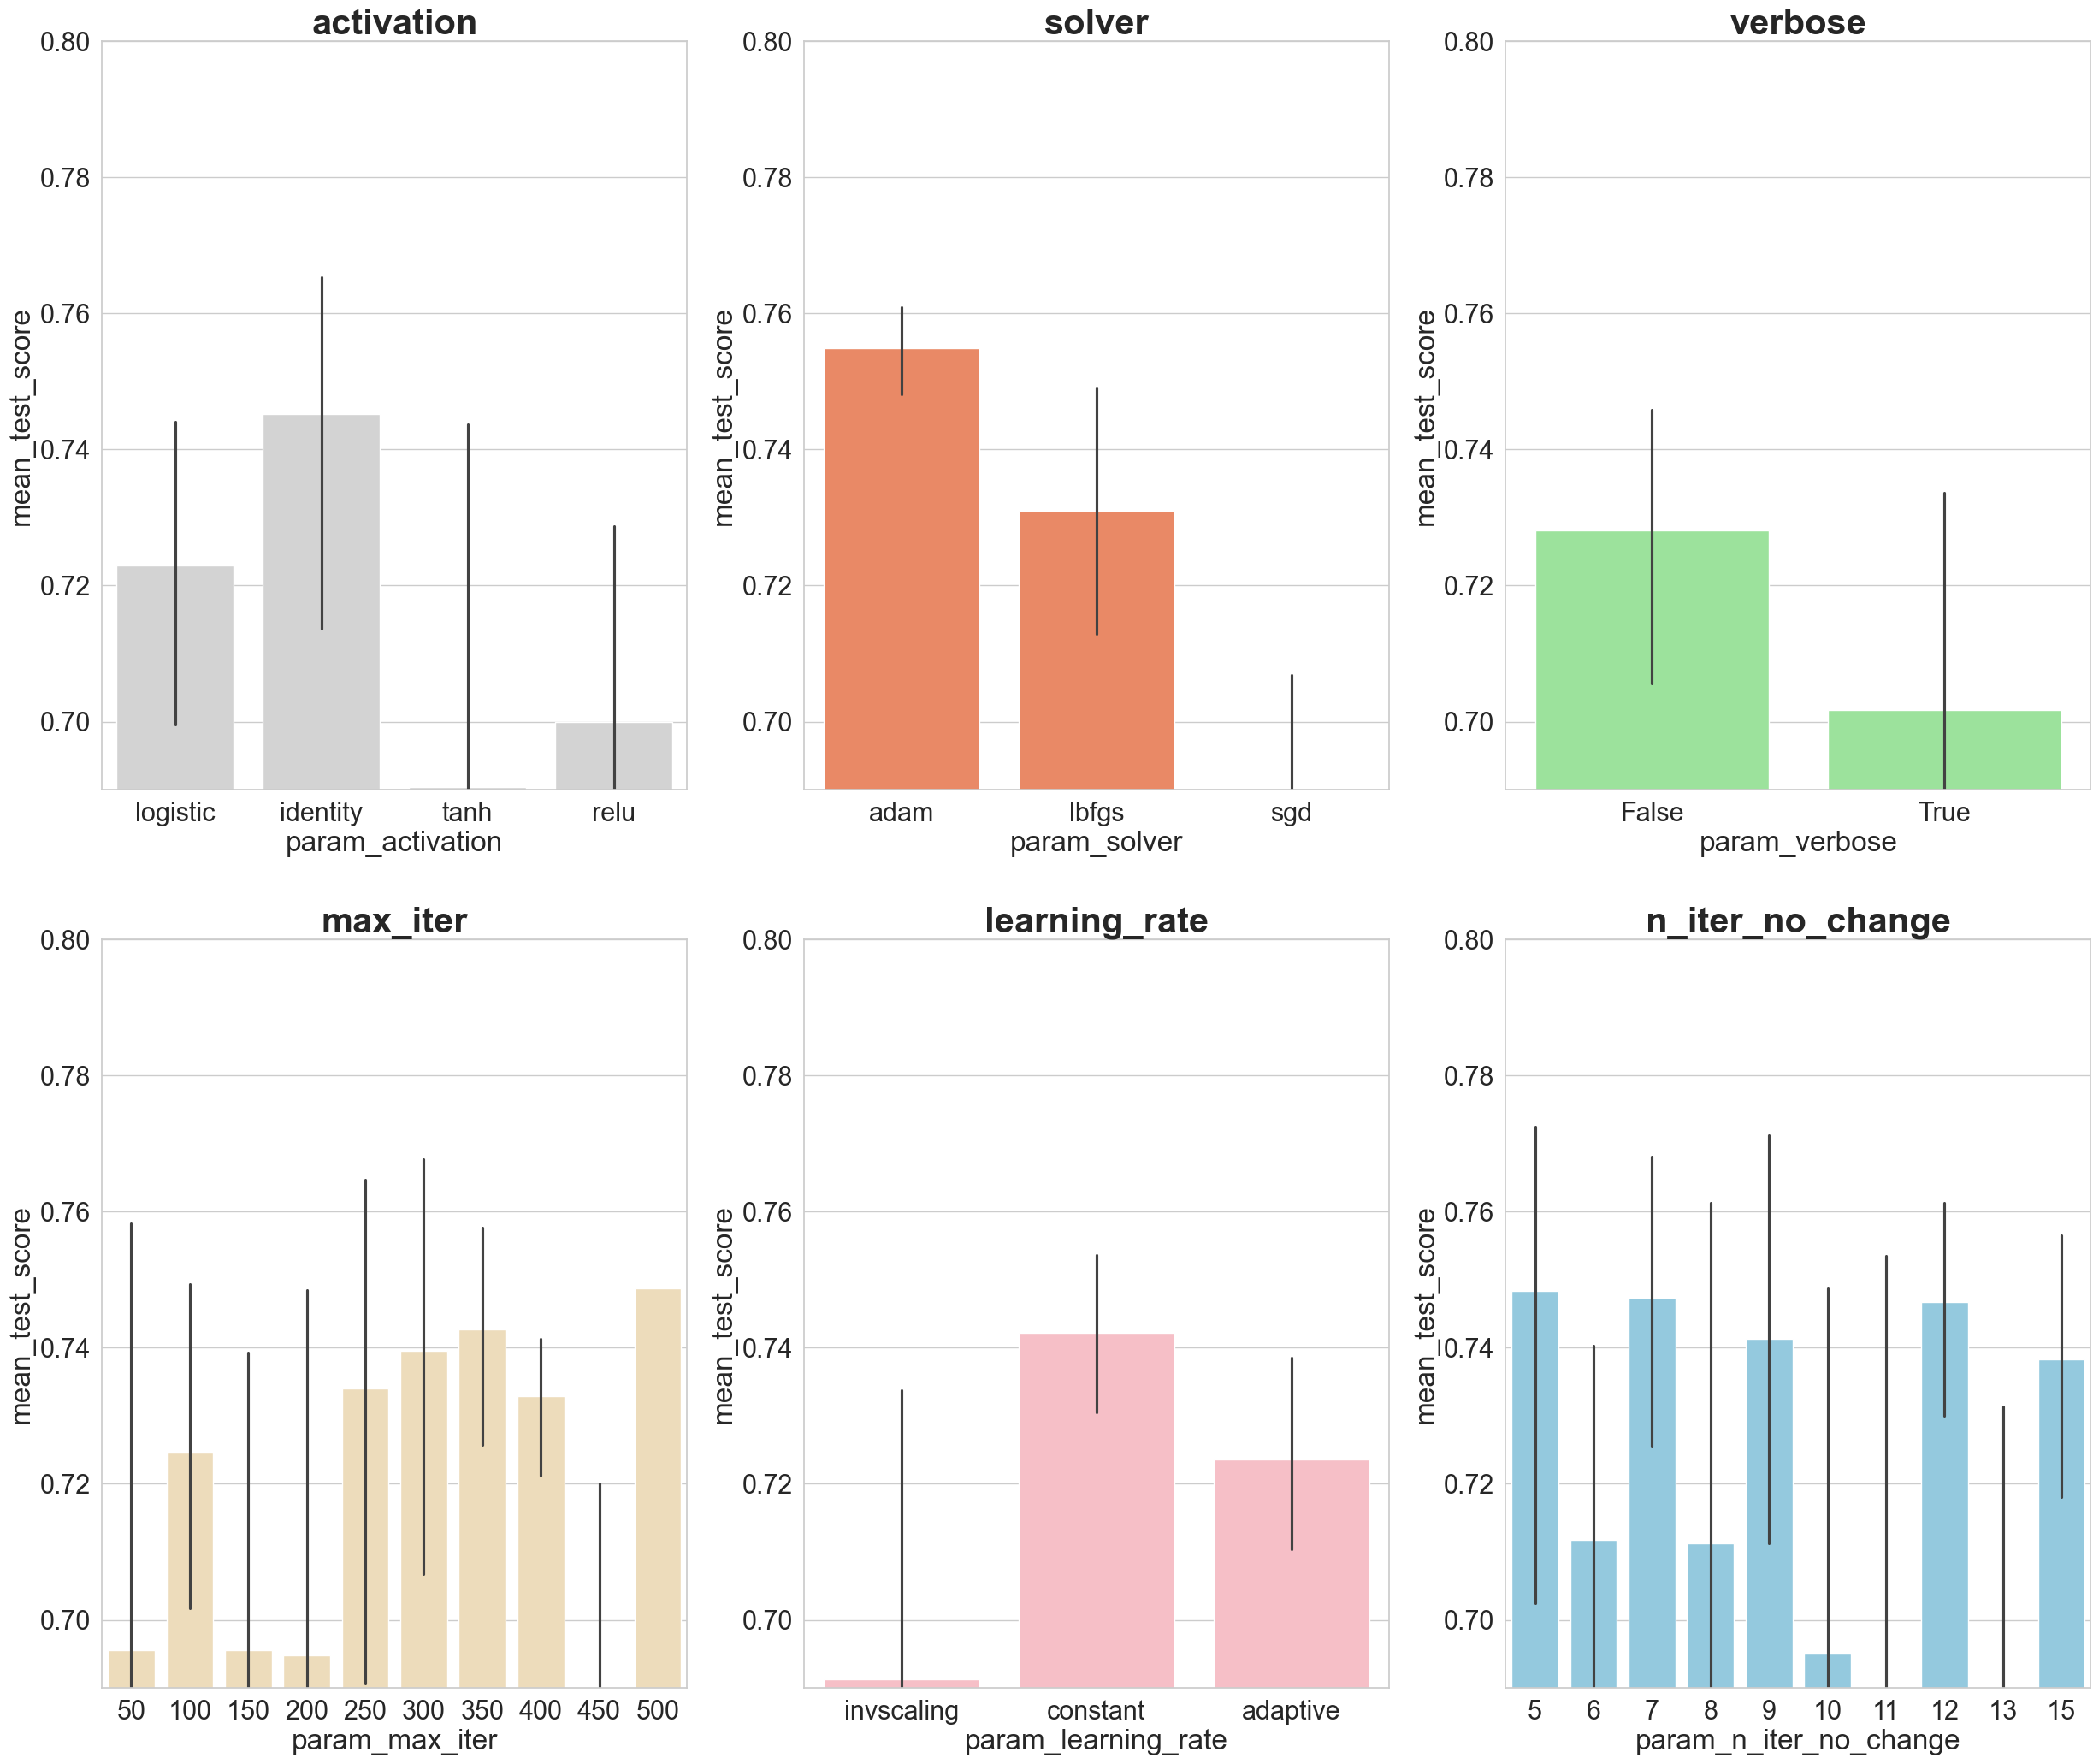

In [44]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set_theme(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_activation', y='mean_test_score', data=rs3_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.69,.80])
axs[0,0].set_title(label = 'activation', size=30, weight='bold')
sns.barplot(x='param_solver', y='mean_test_score', data=rs3_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.69,.80])
axs[0,1].set_title(label = 'solver', size=30, weight='bold')
sns.barplot(x='param_verbose', y='mean_test_score', data=rs3_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.69,.80])
axs[0,2].set_title(label = 'verbose', size=30, weight='bold')
sns.barplot(x='param_max_iter', y='mean_test_score', data=rs3_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.69,.80])
axs[1,0].set_title(label = 'max_iter', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=rs3_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.69,.80])
axs[1,1].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_n_iter_no_change',y='mean_test_score', data=rs3_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.69,.80])
axs[1,2].set_title(label = 'n_iter_no_change', size=30, weight='bold')
plt.show()

In [59]:
mean_X = X_train.mean()
std_X = X_train.std()

X_train_pca = (X_train_pca - mean_X) / std_X
X_test_pca = (X_test_pca - mean_X) / std_X

In [70]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=350, learning_rate='constant', n_iter_no_change=12, activation='identity', verbose=False)
mlp_model.fit(X_train_pca, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test_pca)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.5f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.66258
Accuracy: 0.76
Precision: 0.78
Recall: 0.91


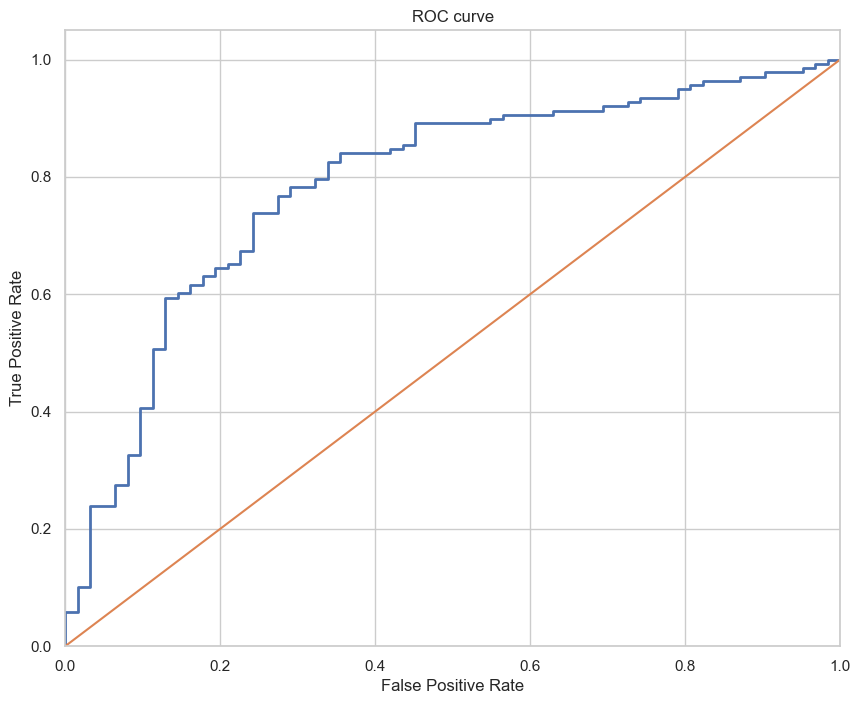

In [71]:
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, mlp_model.predict_proba(X_test_pca)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели